In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

In [5]:
train_1_path = "TrainingData/Train1_3W_10000.csv"
train_2_path = "TrainingData/Train2_20W_20000.csv"

train_1 = pd.read_csv(train_1_path, header=None)
train_2 = pd.read_csv(train_2_path, header=None)
train_1.columns = ['Information']

train_1 = pd.Series(train_1['Information'])
train_1 = train_1.replace("loss=","")
train_1 = train_1.loc[train_1.str.startswith("I0")]
train_1


1      I0217 21:30:46.876585 10616 model_lib_v2.py:65...
3      I0217 21:32:30.433765 10616 model_lib_v2.py:65...
5      I0217 21:34:15.273391 10616 model_lib_v2.py:65...
7      I0217 21:35:57.222239 10616 model_lib_v2.py:65...
9      I0217 21:37:39.627719 10616 model_lib_v2.py:65...
                             ...                        
191    I0218 00:05:02.762575 10616 model_lib_v2.py:65...
193    I0218 00:06:36.817343 10616 model_lib_v2.py:65...
195    I0218 00:08:10.865257 10616 model_lib_v2.py:65...
197    I0218 00:09:44.692165 10616 model_lib_v2.py:65...
199    I0218 00:11:18.406052 10616 model_lib_v2.py:65...
Name: Information, Length: 100, dtype: object

In [17]:
data = train_1.str.split(expand = True)
data_df = pd.DataFrame(data)
# data_df.rename(columns={"0": "Test0", "1": "Test1"}, inplace=True)
data_df.columns = ['Input/Output',
                  'Timestamp',
                  'Model Number',
                  'Model Type',
                  'Step Label',
                  'Step Number',
                  'Per-Step Label',
                  'Time Label',
                  'Seconds to Run',
                  'Loss']
data_df['Loss'].replace("loss=", "", regex=True, inplace=True)
data_df["Loss"] = data_df["Loss"].astype(str).astype(float)
data_df
data_df.dtypes

NameError: name 'df' is not defined

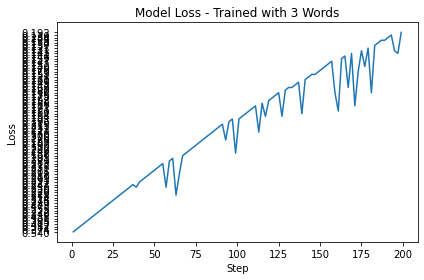

In [12]:
data_df.groupby('Step Number')
plt.plot(data_df.index, data_df["Loss"])

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Model Loss - Trained with 3 Words')

plt.tight_layout()
# plt.xticks(np.arange(min(x), max(x)+1, 500.0)
plt.show()

# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, stepsize))

# x_data = data_df['Step Number']
# y_data = data_df['Loss']

# def lineplot(x_data, y_data, xlabel="Step", ylabel="Loss", title="Model Loss - Trained with 3 Words"):
#     __, ax = plt.subplots()

#     ax.plot(x_data, y_data, lw=3, color ='#539caf', alpha =1)

#     ax.set_title(title)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)

# lineplot(x_data, y_data)


In [5]:
train_2.columns = ['Information']

train_2 = pd.Series(train_2['Information'])
train_2 = train_2.replace("loss=","")
train_2 = train_2.loc[train_2.str.startswith("I0")]
train_2

0      I0221 00:44:54.145070   720 model_lib_v2.py:65...
2      I0221 00:46:48.102827   720 model_lib_v2.py:65...
4      I0221 00:48:38.138948   720 model_lib_v2.py:65...
6      I0221 00:50:21.162815   720 model_lib_v2.py:65...
8      I0221 00:52:04.347821   720 model_lib_v2.py:65...
                             ...                        
288    I0221 05:04:08.817089   720 model_lib_v2.py:65...
290    I0221 05:05:54.290795   720 model_lib_v2.py:65...
292    I0221 05:07:39.208438   720 model_lib_v2.py:65...
294    I0221 05:09:23.764986   720 model_lib_v2.py:65...
296    I0221 05:11:08.331085   720 model_lib_v2.py:65...
Name: Information, Length: 149, dtype: object

In [6]:
data_2 = train_2.str.split(expand = True)
data_df_2 = pd.DataFrame(data)
# data_df.rename(columns={"0": "Test0", "1": "Test1"}, inplace=True)
data_df_2.columns = ['Input/Output',
                  'Timestamp',
                  'Model Number',
                  'Model Type',
                  'Step Label',
                  'Step Number',
                  'Per-Step Label',
                  'Time Label',
                  'Seconds to Run',
                  'Loss']
data_df_2['Loss'].replace("loss=", "", regex=True, inplace=True)
data_df_2

,Input/Output,Timestamp,Model Number,Model Type,Step Label,Step Number,Per-Step Label,Time Label,Seconds to Run,Loss
1,I0217,21:30:46.876585,10616,model_lib_v2.py:659],Step,100,per-step,time,1.077s,0.540
3,I0217,21:32:30.433765,10616,model_lib_v2.py:659],Step,200,per-step,time,1.063s,0.374
5,I0217,21:34:15.273391,10616,model_lib_v2.py:659],Step,300,per-step,time,1.065s,0.382
7,I0217,21:35:57.222239,10616,model_lib_v2.py:659],Step,400,per-step,time,1.015s,0.412
9,I0217,21:37:39.627719,10616,model_lib_v2.py:659],Step,500,per-step,time,1.012s,0.385
...,...,...,...,...,...,...,...,...,...,...
191,I0218,00:05:02.762575,10616,model_lib_v2.py:659],Step,9600,per-step,time,0.936s,0.284
193,I0218,00:06:36.817343,10616,model_lib_v2.py:659],Step,9700,per-step,time,0.926s,0.130
195,I0218,00:08:10.865257,10616,model_lib_v2.py:659],Step,9800,per-step,time,0.935s,0.143
197,I0218,00:09:44.692165,10616,model_lib_v2.py:659],Step,9900,per-step,time,0.940s,0.141


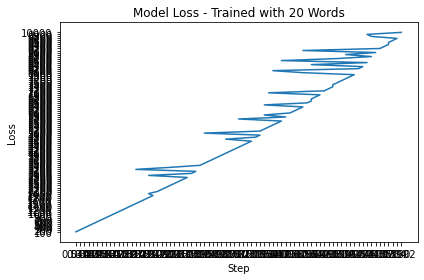

In [7]:
plt.plot(data_df_2["Loss"], data_df_2["Step Number"])

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Model Loss - Trained with 20 Words')

plt.tight_layout()
plt.show()